In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
#Importing the Tree and Metrics Module
from sklearn import metrics

#Decision Tree Algorithm and plot_tree function
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Train-Test Split
from sklearn.model_selection import train_test_split

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Explore Dataset

In [8]:
#Provide the path of the dataset
df = pd.read_csv("E:\\cvs's\\csv files\\Churn_Cleaned.csv", index_col = 0)
df.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True
0,128,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,107,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,137,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,84,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,75,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [9]:
df.shape

(3333, 72)

In [10]:
df.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.02,0.02,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02,0.25,0.50,0.25,0.10,0.28,0.14
std,39.82,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.12,0.15,0.13,0.14,0.10,0.14,0.15,0.13,0.13,0.14,0.13,0.13,0.11,0.15,0.13,0.14,0.14,0.13,0.12,0.14,0.14,0.14,0.15,0.16,0.14,0.14,0.14,0.14,0.14,0.13,0.13,0.14,0.14,0.14,0.16,0.15,0.13,0.15,0.12,0.14,0.13,0.13,0.13,0.15,0.15,0.15,0.15,0.14,0.15,0.18,0.15,0.43,0.50,0.43,0.30,0.45,0.35
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,74.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,101.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,127.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
max,243.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [11]:
df["Churn_True"].value_counts()

0    2850
1     483
Name: Churn_True, dtype: int64

<AxesSubplot:xlabel='Churn_True', ylabel='count'>

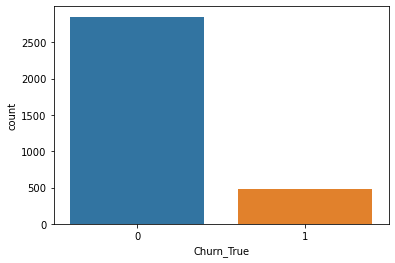

In [12]:
sns.countplot(data = df, x = "Churn_True")

### Pre-processing

In [13]:
### Check for missing values
total = df.isnull().sum().sort_values(ascending=False)
total

Account Length    0
VMail Message     0
State_OR          0
State_OK          0
State_OH          0
State_NY          0
State_NV          0
State_NM          0
State_NJ          0
State_NH          0
State_NE          0
State_ND          0
State_NC          0
State_MT          0
State_MS          0
State_MO          0
State_MN          0
State_PA          0
State_RI          0
State_SC          0
State_WV          0
VMail Plan_yes    0
Intl Plan_yes     0
Area Code_510     0
Area Code_415     0
Area Code_408     0
State_WY          0
State_WI          0
State_SD          0
State_WA          0
State_VT          0
State_VA          0
State_UT          0
State_TX          0
State_TN          0
State_MI          0
State_ME          0
State_MD          0
Night Calls       0
State_AK          0
CustServ Calls    0
Intl Charge       0
Intl Calls        0
Intl Mins         0
Night Charge      0
Night Mins        0
State_AR          0
Eve Charge        0
Eve Calls         0
Eve Mins          0


### Training The Model

In [14]:
x = df.drop(["Churn_True"], axis=1)
y = df["Churn_True"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2499, 71), (834, 71), (2499,), (834,))

In [15]:
## Scale the dataset

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

#Train the model
clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25)

### Validate the Model

In [17]:
y_pred = clf.predict(x_test_scaled)

#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

94.00%


In [18]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       713
           1       0.84      0.73      0.78       121

    accuracy                           0.94       834
   macro avg       0.90      0.85      0.87       834
weighted avg       0.94      0.94      0.94       834




In [19]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[696  17]
 [ 33  88]]


In [20]:
#Encode Confusion Matrix into a DataFrame

#Set Labels
labels = list(y_test.unique())

#Get confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#Convert to DataFrame
cm_df = pd.DataFrame(cm,index=labels, columns=labels)

cm_df

,1,0
1,696,17
0,33,88


### Feature Importance

In [21]:
#Extract the feature importance
f_importance = clf.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)

,Importance
Day Mins,0.26
Eve Mins,0.15
CustServ Calls,0.13
Intl Charge,0.10
Intl Plan_yes,0.09
Intl Calls,0.08
VMail Message,0.04
Day Charge,0.04
Night Charge,0.02
Night Mins,0.02


<AxesSubplot:>

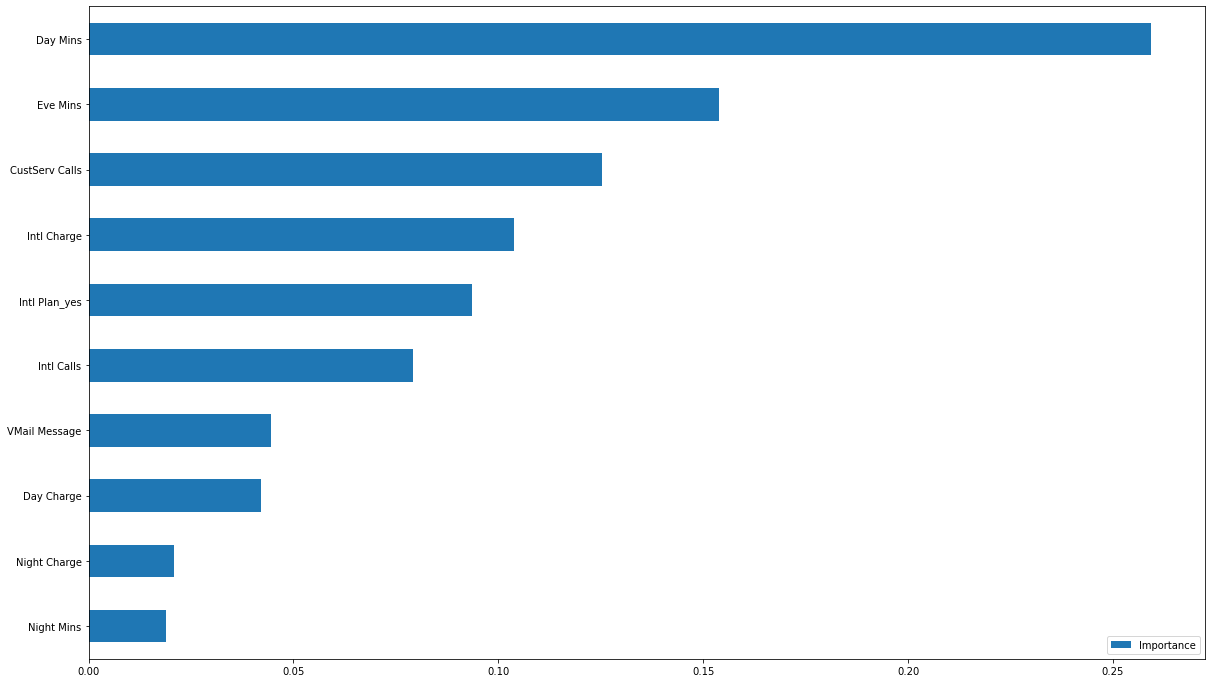

In [22]:
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(20,12))

In [23]:
feature_col = list(x_train.columns)

#Get classes
classes = clf.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['0', '1']

### Visualize the Decision Tree

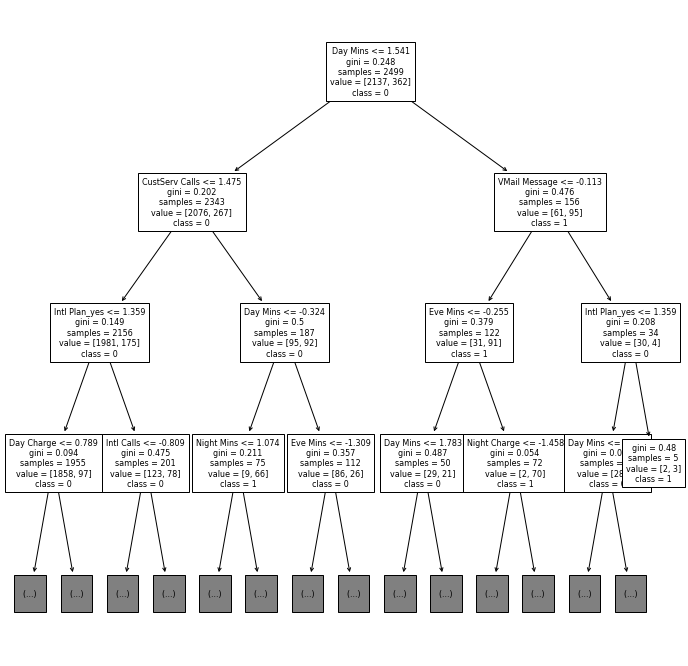

In [24]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#Use the plot tree function
plot_tree(clf, class_names=classes, feature_names=feature_col, fontsize=8, max_depth=3)

#Show the Plot
plt.show()

### Cross Validation

In [25]:
#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validatea

In [26]:
# Create a pipeline to add scaling to the original dataframe 
#(we want to scale based on the train partitions on every fold)

from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

model = make_pipeline(StandardScaler(), clf)

cv_results = cross_val_score(model, x_train, y_train, cv=5)

print(cv_results)

[0.926      0.936      0.93       0.942      0.93186373]


In [27]:
#Get the Mean to get the average accuracy 
print("Accuracy: {:.2%}".format(np.mean(cv_results)))

Accuracy: 93.32%


In [28]:
cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
print (cv_results)

{'fit_time': array([0.07599545, 0.05072188, 0.04686165, 0.06249142, 0.06342602]), 'score_time': array([0.02200246, 0.01563668, 0.03125882, 0.02099824, 0.01563716]), 'test_accuracy': array([0.926     , 0.936     , 0.93      , 0.942     , 0.93186373]), 'test_f1_weighted': array([0.9244096 , 0.93398146, 0.92552552, 0.94183392, 0.92971564]), 'test_roc_auc': array([0.87469172, 0.86945093, 0.85579545, 0.89875205, 0.86407104])}


In [29]:
df_scores = pd.DataFrame(cv_results)

print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.08        0.02           0.93              0.92          0.87
1      0.05        0.02           0.94              0.93          0.87
2      0.05        0.03           0.93              0.93          0.86
3      0.06        0.02           0.94              0.94          0.90
4      0.06        0.02           0.93              0.93          0.86
Averages 
Accuracy: 93.317275%, f1: 93.109323%, roc_auc: 87.255224%


In [30]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=20, random_state=25)
model = make_pipeline(StandardScaler(), clf )


cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
df_scores = pd.DataFrame(cv_results)
df_scores
print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.07        0.01           0.90              0.90          0.82
1      0.05        0.02           0.93              0.93          0.85
2      0.06        0.00           0.91              0.91          0.79
3      0.06        0.02           0.92              0.93          0.88
4      0.06        0.02           0.92              0.92          0.85
Averages 
Accuracy: 91.716633%, f1: 91.739825%, roc_auc: 83.630949%


### Build a Model - Best Parameter

In [31]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)
model = make_pipeline(StandardScaler(), clf )

clf.fit(x_train_scaled, y_train)

y_pred = clf.predict(x_test_scaled)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       713
           1       0.84      0.73      0.78       121

    accuracy                           0.94       834
   macro avg       0.90      0.85      0.87       834
weighted avg       0.94      0.94      0.94       834


